In [22]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

from scipy.stats import linregress

import matplotlib.pyplot as plt

# Read Data

Note that in order to get the input data you just need to follow the instructions in:
    - eQTL: generate_eQTL_data.md
    - data: generate_linear_hiC.md

In [2]:
data_directory = '../github/data/GTEx_Analysis_v7_eQTL_EVB_linearData_hiC.csv'
eqtl_directory = '../github/data/GTEx_Analysis_v7_eQTL_allTissues_slope_top.csv.gz'

In [3]:
data = pd.read_csv(data_directory)
print(data.shape)
data.head()

(7973, 210)


,variant_id,gene_id,enhancer_id,promoter_id,enhancer_ATF2,enhancer_ATF3,enhancer_BATF,enhancer_BCL11A,enhancer_BCL3,enhancer_BCLAF1,...,promoter_ZNF143,promoter_ZNF384,promoter_ZZZ3,hiC_raw,hiC_kr,hiC_vc,hiC_sq,hiC_krExpected,hiC_vcExpected,hiC_sqExpected
0,10_71909020_G_A_b37,ENSG00000180817,GM12878|chr10:71907000-71907190,GM12878|chr10:70230752-70232065,50.712577,0.0,0.000000,0.000000,24.444864,0.0,...,0.0,0.0,0.0,1.0,0.805034,0.614176,0.849877,1.645056,1.313051,1.736869
1,10_71920061_A_G_b37,ENSG00000180817,GM12878|chr10:71922000-71922178,GM12878|chr10:70230752-70232065,37.637504,0.0,81.402626,25.595211,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,10_71920061_A_G_b37,ENSG00000180817,GM12878|chr10:71922296-71923000,GM12878|chr10:70230752-70232065,37.637504,0.0,81.402626,25.595211,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,10_71936034_T_C_b37,ENSG00000180817,GM12878|chr10:71933708-71934121,GM12878|chr10:70230752-70232065,0.000000,0.0,31.352989,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.789560,0.587418,0.831157,1.641114,1.257254,1.734430
4,10_71936252_G_C_b37,ENSG00000180817,GM12878|chr10:71933708-71934121,GM12878|chr10:70230752-70232065,0.000000,0.0,31.352989,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.789560,0.587418,0.831157,1.641114,1.257254,1.734430


In [4]:
eqtl = pd.read_csv(eqtl_directory)
print(eqtl.shape)
eqtl.head()

(1349165, 50)


,gene_id,variant_id,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,...,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood,Cells_EBV-transformed_lymphocytes
0,ENSG00000173801,17_39610981_A_G_b37,NaN,NaN,NaN,NaN,NaN,-0.146567,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000100219,22_29149887_G_C_b37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000206341,6_29817896_C_T_b37,0.692326,0.712692,1.14229,0.531796,NaN,NaN,NaN,0.689146,...,0.941748,NaN,0.826604,0.658147,0.427333,0.473418,NaN,NaN,0.794383,1.03219
3,ENSG00000198502,6_32226520_T_G_b37,NaN,NaN,NaN,NaN,-0.591224,-0.307221,NaN,NaN,...,-0.379419,NaN,NaN,-0.374231,NaN,-0.439161,NaN,NaN,-0.317301,NaN
4,ENSG00000112763,6_26601733_G_T_b37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225490,NaN


In [5]:
data = data.merge(eqtl, on=['gene_id', 'variant_id'])
print(data.shape)
data.head()

(7973, 258)


,variant_id,gene_id,enhancer_id,promoter_id,enhancer_ATF2,enhancer_ATF3,enhancer_BATF,enhancer_BCL11A,enhancer_BCL3,enhancer_BCLAF1,...,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood,Cells_EBV-transformed_lymphocytes
0,10_71909020_G_A_b37,ENSG00000180817,GM12878|chr10:71907000-71907190,GM12878|chr10:70230752-70232065,50.712577,0.0,0.000000,0.000000,24.444864,0.0,...,-0.528287,NaN,NaN,NaN,NaN,-0.307980,NaN,NaN,NaN,-0.783245
1,10_71920061_A_G_b37,ENSG00000180817,GM12878|chr10:71922000-71922178,GM12878|chr10:70230752-70232065,37.637504,0.0,81.402626,25.595211,0.000000,0.0,...,-0.520049,NaN,NaN,NaN,-0.325961,-0.298817,NaN,NaN,NaN,-0.783245
2,10_71920061_A_G_b37,ENSG00000180817,GM12878|chr10:71922296-71923000,GM12878|chr10:70230752-70232065,37.637504,0.0,81.402626,25.595211,0.000000,0.0,...,-0.520049,NaN,NaN,NaN,-0.325961,-0.298817,NaN,NaN,NaN,-0.783245
3,10_71936034_T_C_b37,ENSG00000180817,GM12878|chr10:71933708-71934121,GM12878|chr10:70230752-70232065,0.000000,0.0,31.352989,0.000000,0.000000,0.0,...,0.287336,NaN,0.330151,0.256926,0.277420,0.334002,NaN,NaN,NaN,0.424550
4,10_71936252_G_C_b37,ENSG00000180817,GM12878|chr10:71933708-71934121,GM12878|chr10:70230752-70232065,0.000000,0.0,31.352989,0.000000,0.000000,0.0,...,0.362418,NaN,NaN,NaN,0.302862,0.373364,NaN,NaN,0.174263,0.470752


In [6]:
# Get list of features names for each subset

In [6]:
epigenomicFeatures = list(i for i in data.columns if i.startswith('enha') or i.startswith('prom'))[2:]
hiCFeatures = list(i for i in data.columns if i.startswith('hi'))
eQTLFeatures = list(eqtl.columns[2:-1])

In [7]:
data = data.fillna(0)

In [8]:
def decision_tree_regressor(data, X_label, y_label, random_state, test_size=0.3, max_depth=None):
    """
    This bla bla bla
    
    """
    
    # Split data
    X = data[X_label]
    y = data[y_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    print(X_train.shape)
    # Create a model and train it
    model = DecisionTreeRegressor(random_state=random_state, max_depth=max_depth)
    model = model.fit(X_train, y_train)
    
    # Predict values for test set and asses error
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Return result object
    return {'rmse':rmse, 'model':model, 'y_pred':y_pred}

In [9]:
def random_forest_regressor(data, X_label, y_label, random_state, test_size=0.3, max_depth=None, n_estimators=100):
    """
    This bla bla bla
    
    """
    
    # Split data
    X = data[X_label]
    y = data[y_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create a model and train it
    model = RandomForestRegressor(random_state=random_state, max_depth=max_depth, n_estimators=n_estimators)
    model = model.fit(X_train, y_train)
    
        
    # Predict values for test set and asses error
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred)
    
    
    # Return result object
    return {'rmse':rmse, 'model':model, 'y_pred':y_pred, 'r_value':r_value, 'y_test':y_test}

In [10]:
def dummy_regressor(data, y_label, random_state, test_size=0.3):
    """
    This bla bla bla
    
    """
    
    # Split data
    X = data[X_label]
    y = data[y_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create a model and train it
    model = DummyRegressor()
    model = model.fit(X_train, y_train)
    
    # Predict values for test set and asses error
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Return result object
    return {'rmse':rmse, 'model':model, 'y_pred':y_pred}

In [11]:
random_state = 42

In [12]:
y_label = 'Cells_EBV-transformed_lymphocytes'

In [13]:
### Only Epigenomic Data
X_label = epigenomicFeatures

# Random Forest
epig_rf_5 = random_forest_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
epig_rf_d = random_forest_regressor(data, X_label, y_label, random_state=random_state)

# Decision Tree
epig_dt_5 = decision_tree_regressor(data, X_label, y_label, random_state, max_depth=5)
epig_dt_d = decision_tree_regressor(data, X_label, y_label, random_state=random_state)

(5581, 199)
(5581, 199)


In [14]:
### Only Hi-C Data
X_label = hiCFeatures

# Random Forest
hiC_rf_5 = random_forest_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
hiC_rf_d = random_forest_regressor(data, X_label, y_label, random_state=random_state)

# Decision Tree
hiC_dt_5 = decision_tree_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
hiC_dt_d = decision_tree_regressor(data, X_label, y_label, random_state=random_state)

(5581, 7)
(5581, 7)


In [15]:
### Only Tissue Especific Data
X_label = hiCFeatures + epigenomicFeatures

# Random Forest
ts_rf_5 = random_forest_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
ts_rf_d = random_forest_regressor(data, X_label, y_label, random_state=random_state)

# Decision Tree
ts_dt_5 = decision_tree_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
ts_dt_d = decision_tree_regressor(data, X_label, y_label, random_state=random_state)

(5581, 206)
(5581, 206)


In [16]:
### Only eQTL Data
X_label = eQTLFeatures

# Random Forest
eQTL_rf_5 = random_forest_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
eQTL_rf_d = random_forest_regressor(data, X_label, y_label, random_state=random_state)

# Decision Tree
eQTL_dt_5 = decision_tree_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
eQTL_dt_d = decision_tree_regressor(data, X_label, y_label, random_state=random_state)

(5581, 47)
(5581, 47)


In [17]:
### Only eQTL Data
X_label = eQTLFeatures + hiCFeatures + epigenomicFeatures

# Random Forest
all_rf_5 = random_forest_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
all_rf_d = random_forest_regressor(data, X_label, y_label, random_state=random_state)

# Decision Tree
all_dt_5 = decision_tree_regressor(data, X_label, y_label, random_state=random_state, max_depth=5)
all_dt_d = decision_tree_regressor(data, X_label, y_label, random_state=random_state)

(5581, 253)
(5581, 253)


In [18]:
dummy = dummy_regressor(data, y_label, random_state)

# Table 1

In [19]:
# Print errors
print('RMSE')
print('Data','RF 5', 'RF d', 'DT 5', 'DT d', sep='\t')
print("Epig\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}".\
      format(epig_rf_5['rmse'], epig_rf_d['rmse'], epig_dt_5['rmse'], epig_dt_d['rmse']))
print("Hi-C\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}".\
      format(hiC_rf_5['rmse'], hiC_rf_d['rmse'], hiC_dt_5['rmse'], hiC_dt_d['rmse']))
print("TS\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}".\
      format(ts_rf_5['rmse'], ts_rf_d['rmse'], ts_dt_5['rmse'], ts_dt_d['rmse']))
print("eQTL\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}".\
      format(eQTL_rf_5['rmse'], eQTL_rf_d['rmse'], eQTL_dt_5['rmse'], eQTL_dt_d['rmse']))
print("All\t{:.4f}\t{:.4f}\t{:.4f}\t{:.4f}".\
      format(all_rf_5['rmse'], all_rf_d['rmse'], all_dt_5['rmse'], all_dt_d['rmse']))
print('Dummy: {:.4f}'.format(dummy['rmse']))

RMSE
Data	RF 5	RF d	DT 5	DT d
Epig	0.3798	0.2414	0.4307	0.2608
Hi-C	0.4626	0.3225	0.4726	0.3303
TS	0.3798	0.2414	0.4306	0.2795
eQTL	0.3005	0.2528	0.3165	0.2693
All	0.2819	0.0976	0.3245	0.1449
Dummy: 0.6462


# Figure 1

In [53]:
X_label = hiCFeatures + epigenomicFeatures
export_graphviz(ts_dt_d['model'], out_file='../figures/figure1.dot', feature_names=X_label, rotate=True, max_depth=5)

In [54]:
!rm ../figures/figure1.png
!dot -Tpng ../figures/figure1.dot -o ../figures/figure1.png

# Figure 1B

In [29]:
# Split data
features = eQTLFeatures
X = data[features]
y = data[y_label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

forest = ExtraTreesRegressor(n_estimators=100, random_state=random_state)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [37]:
d_f = {}
for f in range(len(features)):
    #print("%d. feature %d    \t %s (%f)" % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))
    d_f[features[indices[f]]] = importances[indices[f]]

In [36]:
t, i = zip(*d_f.items())
pd.DataFrame({'Tissue':t, 'Importance':i}).to_csv('../github/data/figure_1_RF.csv', index=False)

# Z-Scores

When taking into account LD we need to focus on a chromosome at a time. For table 2 I used chromosome 1 since is the one with more eQTL. To get the data with z-scores FineMap is needed. Rhe instructions can be found in FineMap.ipynb

In [23]:
z_directory = '../github/data/GTEx_Analysis_v7_eQTL_EVB_linearData_hiC_z.csv'

In [24]:
data_z = pd.read_csv(z_directory)
print(data_z.shape)
data.head()

(355, 247)


,variant_id,gene_id,enhancer_id,promoter_id,enhancer_ATF2,enhancer_ATF3,enhancer_BATF,enhancer_BCL11A,enhancer_BCL3,enhancer_BCLAF1,...,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood,Cells_EBV-transformed_lymphocytes
0,10_71909020_G_A_b37,ENSG00000180817,GM12878|chr10:71907000-71907190,GM12878|chr10:70230752-70232065,50.712577,0.0,0.000000,0.000000,24.444864,0.0,...,-0.528287,0.0,0.000000,0.000000,0.000000,-0.307980,0.0,0.0,0.000000,-0.783245
1,10_71920061_A_G_b37,ENSG00000180817,GM12878|chr10:71922000-71922178,GM12878|chr10:70230752-70232065,37.637504,0.0,81.402626,25.595211,0.000000,0.0,...,-0.520049,0.0,0.000000,0.000000,-0.325961,-0.298817,0.0,0.0,0.000000,-0.783245
2,10_71920061_A_G_b37,ENSG00000180817,GM12878|chr10:71922296-71923000,GM12878|chr10:70230752-70232065,37.637504,0.0,81.402626,25.595211,0.000000,0.0,...,-0.520049,0.0,0.000000,0.000000,-0.325961,-0.298817,0.0,0.0,0.000000,-0.783245
3,10_71936034_T_C_b37,ENSG00000180817,GM12878|chr10:71933708-71934121,GM12878|chr10:70230752-70232065,0.000000,0.0,31.352989,0.000000,0.000000,0.0,...,0.287336,0.0,0.330151,0.256926,0.277420,0.334002,0.0,0.0,0.000000,0.424550
4,10_71936252_G_C_b37,ENSG00000180817,GM12878|chr10:71933708-71934121,GM12878|chr10:70230752-70232065,0.000000,0.0,31.352989,0.000000,0.000000,0.0,...,0.362418,0.0,0.000000,0.000000,0.302862,0.373364,0.0,0.0,0.174263,0.470752


In [25]:
data_z = data_z.merge(eqtl, on=['variant_id', 'gene_id'])
print(data_z.shape)
data_z.head()

(355, 295)


,variant_id,gene_id,enhancer_id,promoter_id,enhancer_ATF2,enhancer_ATF3,enhancer_BATF,enhancer_BCL11A,enhancer_BCL3,enhancer_BCLAF1,...,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood,Cells_EBV-transformed_lymphocytes
0,1_1239339_T_G_b37,ENSG00000127054,GM12878|chr1:1240136-1240200,GM12878|chr1:1309330-1312050,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,-0.612288,-0.170141,NaN,NaN,NaN,-0.491033
1,1_1241800_A_G_b37,ENSG00000127054,GM12878|chr1:1240136-1240200,GM12878|chr1:1309330-1312050,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,-0.574095,NaN,NaN,NaN,NaN,-0.501763
2,1_1242707_A_G_b37,ENSG00000127054,GM12878|chr1:1240136-1240200,GM12878|chr1:1309330-1312050,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,-0.158452,NaN,NaN,NaN,-0.487816
3,1_1242707_A_G_b37,ENSG00000127054,GM12878|chr1:1245169-1245389,GM12878|chr1:1309330-1312050,37.873228,0.0,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,-0.158452,NaN,NaN,NaN,-0.487816
4,1_150534368_T_C_b37,ENSG00000163131,GM12878|chr1:150536600-150539000,GM12878|chr1:150737600-150738647,212.240730,0.0,269.597139,138.612936,76.306715,85.723618,...,-0.254767,NaN,NaN,-0.195042,-0.276865,-0.331052,NaN,NaN,NaN,-0.424406


In [26]:
data_z = data_z.fillna(0)

In [27]:
y_label = 'Cells_EBV-transformed_lymphocytes'

X_label = epigenomicFeatures
epig_rf_b = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = hiCFeatures
hic_rf_b = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = epigenomicFeatures + hiCFeatures
ts_rf_b = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = eQTLFeatures
eQTL_rf_b = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = eQTLFeatures + epigenomicFeatures + hiCFeatures
all_rf_b = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

In [28]:
y_label = 'z'

X_label = epigenomicFeatures
epig_rf_z = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = hiCFeatures
hic_rf_z = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = epigenomicFeatures + hiCFeatures
ts_rf_z = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = eQTLFeatures
eQTL_rf_z = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

X_label = eQTLFeatures + epigenomicFeatures + hiCFeatures
all_rf_z = random_forest_regressor(data_z, X_label, y_label, random_state=random_state, max_depth=5)

In [29]:
print('R value')
print('Data','Slope', 'Z-score', sep='\t')
print("Epi\t{:.4f}\t{:.4f}".format(epig_rf_b['r_value'], epig_rf_z['r_value']))
print("HiC\t{:.4f}\t{:.4f}".format(hic_rf_b['r_value'], hic_rf_z['r_value']))
print("TS\t{:.4f}\t{:.4f}".format(ts_rf_b['r_value'], ts_rf_z['r_value']))
print("eQTL\t{:.4f}\t{:.4f}".format(eQTL_rf_b['r_value'], eQTL_rf_z['r_value']))
print("All\t{:.4f}\t{:.4f}".format(all_rf_b['r_value'], all_rf_z['r_value']))

R value
Data	Slope	Z-score
Epi	0.8094	0.8251
HiC	0.7725	0.7733
TS	0.8149	0.8259
eQTL	0.9592	0.9609
All	0.9681	0.9715


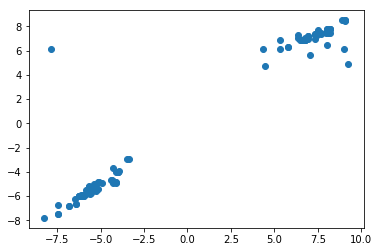

In [30]:
plt.scatter(all_rf_z['y_test'], all_rf_z['y_pred'])